# Pymaceuticals Inc.
---

### Analysis

- We can see that we have an even distribution between male and female mice. 
- We can also see that there's a strong focus on both Capomulin and Ramicane, and a weak focus on Propriva.
- Capomulin and Ramicane have lowered volume distribution with ramicane having a lower and upper quartile.
- Infubinol has a single outlier in volume.
- We can also se Capomulin brings the tumor volume down overtime on different mice.
- There is also no statistical signficance or connection between weight and average tumor volume. 
- We should include way more mice in these trials to increase our ability to see if these either Capomulin or Ramicane are more effective. Something around 300 mice per drug and Control group to add (placebo).
 

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
#importing specifically linregress for the last step
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

#I am aware this doesn't look exactly like the example but it gets the job done
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [49]:
# Checking the number of mice.
unique_mice = combined_data['Mouse ID'].nunique()
unique_mice

249

In [50]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [51]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data['Mouse ID'] == 'g989']
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [52]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Remove all data for the duplicate mouse ID
cleaned_data = combined_data[combined_data['Mouse ID'] != 'g989']

# Reorder columns as specified
reordered_columns = ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']
cleaned_data = cleaned_data[reordered_columns]

# Display the first few rows of the cleaned and reordered dataset
cleaned_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [53]:
# Checking the number of mice in the clean DataFrame.
unique_mice = cleaned_data['Mouse ID'].nunique()
unique_mice

248

## Summary Statistics

In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_data = cleaned_data.groupby('Drug Regimen')
mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_data['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = grouped_data['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_data['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics_table = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_dev_tumor_volume,
    "Tumor Volume SEM": sem_tumor_volume
})
summary_statistics_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [55]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats_agg = cleaned_data.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Total Number of Observations for Each Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse TimePoints'>

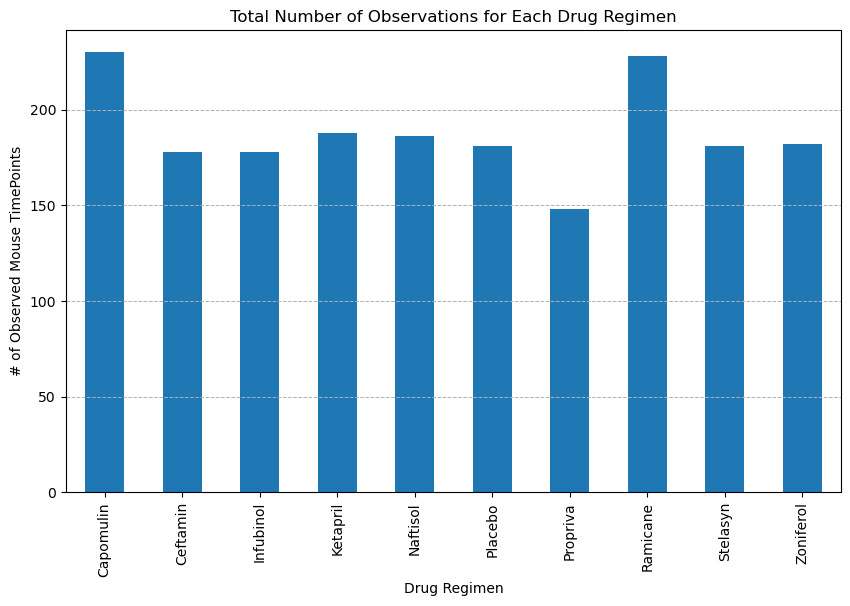

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Obsevations_drug_bar_data = cleaned_data.groupby('Drug Regimen').count()['Mouse ID']
Obsevations_drug_bar = Obsevations_drug_bar_data.plot(kind='bar', figsize=(10,6), title='Total Number of Observations for Each Drug Regimen')

Obsevations_drug_bar.set_xlabel('Drug Regimen')
Obsevations_drug_bar.set_ylabel('# of Observed Mouse TimePoints')
Obsevations_drug_bar.grid(axis='y', linestyle='--', linewidth=0.7)

# Save the plot
plt.savefig('output/OBSVPERDRUGBar.png')
Obsevations_drug_bar

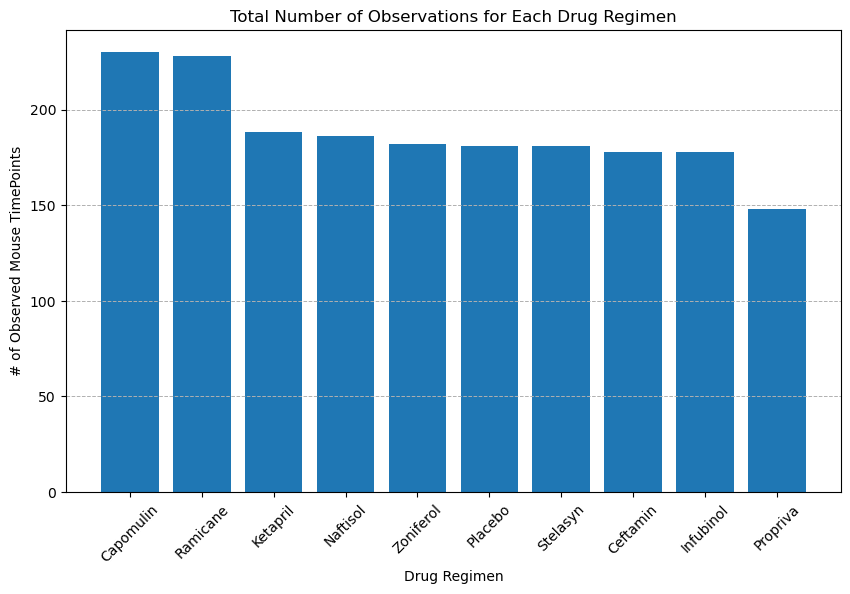

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimens = cleaned_data['Drug Regimen'].unique()
observations = cleaned_data.groupby('Drug Regimen').count()['Mouse ID'].sort_values(ascending=False)

# Sorting drug_regimens based on observations to match the order
drug_regimens_sorted = observations.index.tolist()

# Generate the plot
plt.figure(figsize=(10,6))
plt.bar(drug_regimens_sorted, observations[drug_regimens_sorted])
plt.title('Total Number of Observations for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse TimePoints')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Save the plot
plt.savefig('output/OBSVPERDRUGpltBar.png')
plt.show()

Sex
Male      125
Female    123
Name: count, dtype: int64

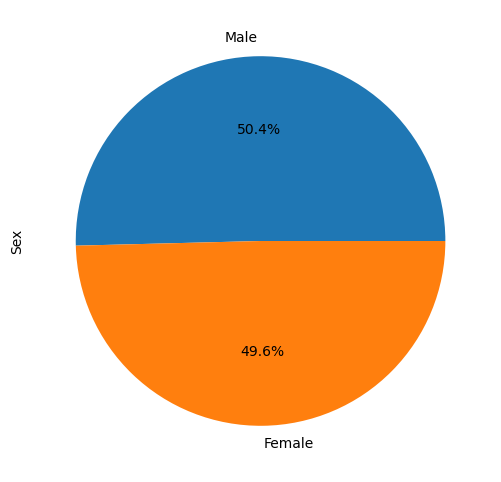

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = cleaned_data.drop_duplicates("Mouse ID")['Sex'].value_counts()

# Generate the pie plot
pie_plot = sex_distribution.plot(kind='pie', figsize=(6,6), autopct='%1.1f%%', title='')

pie_plot.set_ylabel('Sex') 

# Save the plot
pie_plot.figure.savefig("output/sex_distribution_pandas.png")

sex_distribution

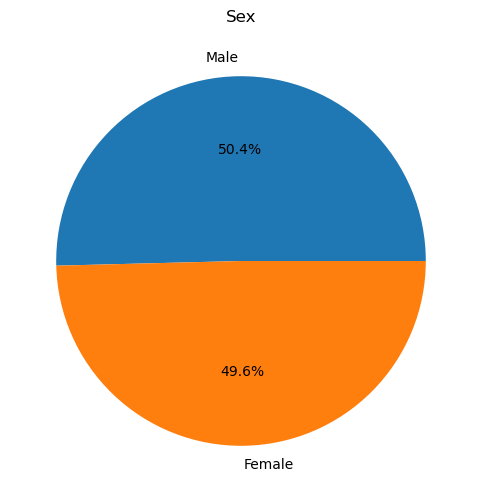

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sex_distribution.index
sizes = sex_distribution.values


# Generate the plot
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',)
plt.title('Sex')

# Save the plot
plt.savefig("output/sex_distribution_pyplot.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = cleaned_data[cleaned_data['Drug Regimen'].isin(treatments)]

# Get the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this with the original DataFrame to get the tumor volume at the last timepoint
merged_final_volume = pd.merge(last_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')
merged_final_volume.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [61]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# For each treatment, calculate the IQR and quantitatively determine if there are any potential outliers
for treatment in treatments_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_final_volume.loc[merged_final_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers.values}")

# Output is structured to print potential outliers for each treatment regimen directly

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


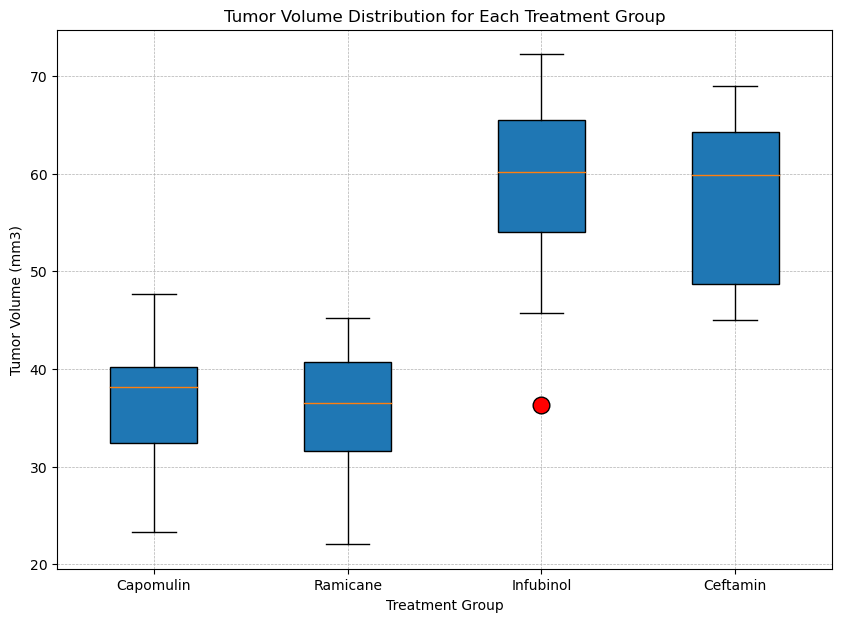

In [62]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots(figsize=(10,7))
ax.boxplot(tumor_vol_list, labels=treatments_list, patch_artist=True, flierprops=dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none'))

ax.set_title('Tumor Volume Distribution for Each Treatment Group')
ax.set_xlabel('Treatment Group')
ax.set_ylabel('Tumor Volume (mm3)')
ax.grid(True, linestyle='--', linewidth=0.5)

plt.savefig("output/tumor_volume_distribution_boxplot.png")
plt.show()

## Line and Scatter Plots

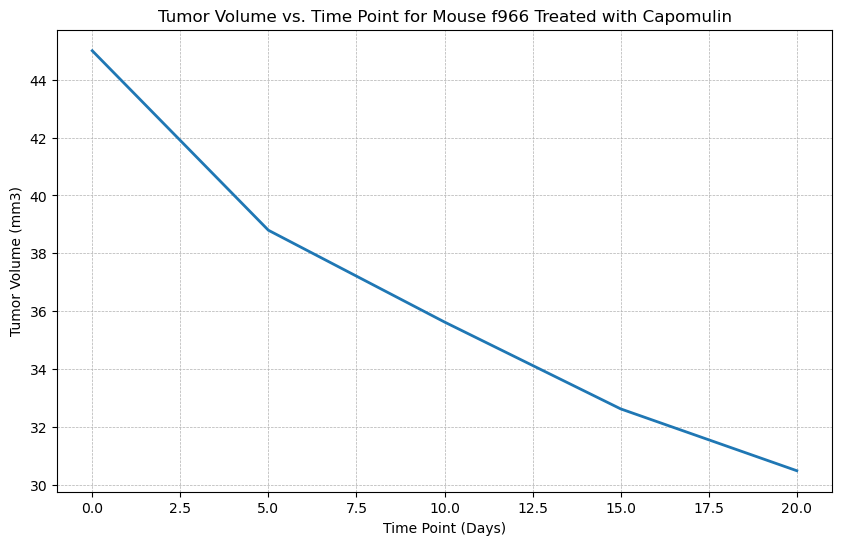

In [63]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
mouse_id = capomulin_data['Mouse ID'].unique()[3]  # Select the the mouse number you're looking for within the square brackets

# Filter data for the selected mouse
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Generate a line plot of tumor volume vs. time point for the selected mouse
plt.figure(figsize=(10,6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], linestyle='-', linewidth=2)
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin')
plt.xlabel('Time Point (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True, linestyle='--', linewidth=0.5)

plt.savefig(f"output/tumor_volume_timepoint_{mouse_id}.png")
plt.show()

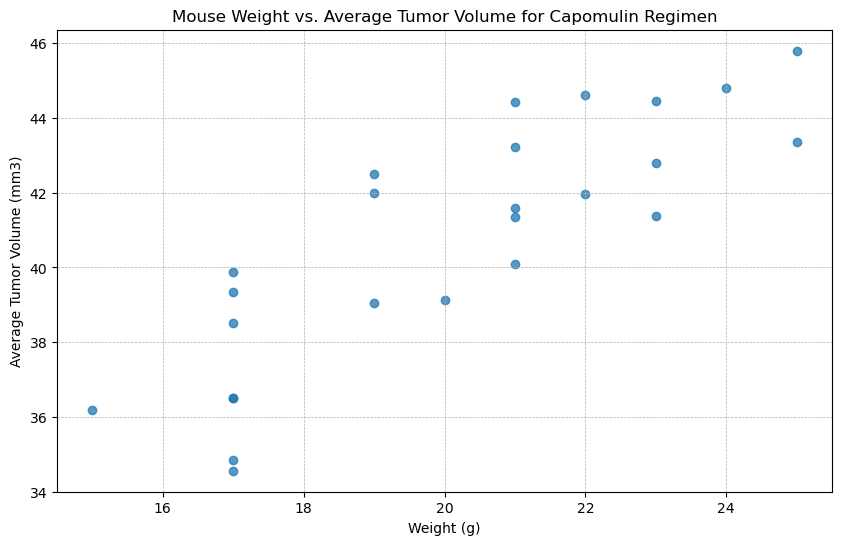

In [64]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg_tumor_vol = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)':'mean', 'Weight (g)':'mean'}).reset_index()

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.figure(figsize=(10,6))
plt.scatter(capomulin_avg_tumor_vol['Weight (g)'], capomulin_avg_tumor_vol['Tumor Volume (mm3)'], alpha=0.75)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True, linestyle='--', linewidth=0.5)

plt.savefig("output/weight_vs_avg_tumor_vol_capomulin.png")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


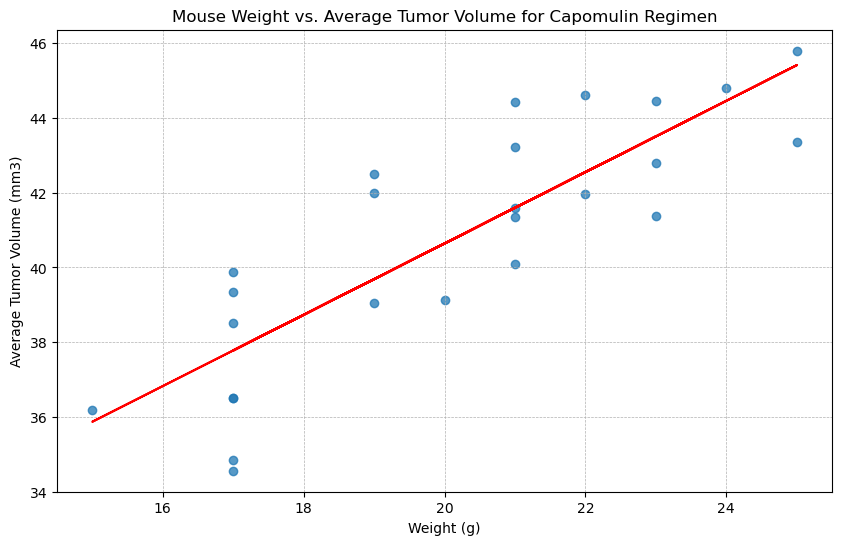

In [66]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient
correlation = capomulin_avg_tumor_vol['Weight (g)'].corr(capomulin_avg_tumor_vol['Tumor Volume (mm3)'])

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_avg_tumor_vol['Weight (g)'], capomulin_avg_tumor_vol['Tumor Volume (mm3)'])
regress_values = capomulin_avg_tumor_vol['Weight (g)'] * slope + intercept

# Plot the scatter plot again with the regression line
plt.figure(figsize=(10,6))
plt.scatter(capomulin_avg_tumor_vol['Weight (g)'], capomulin_avg_tumor_vol['Tumor Volume (mm3)'],alpha=0.75)
plt.plot(capomulin_avg_tumor_vol['Weight (g)'], regress_values, "r-")
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True, linestyle='--', linewidth=0.5)
# The grid feels like it adds more to the graph
# Show the plot and the correlation coefficient
plt.savefig("output/weight_vs_avg_tumor_vol_capomulin_regression.png")
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}.")